In [1]:
%load_ext autoreload
%autoreload 2

# Imports
import tensorflow as tf
import recommender
from recommender import FactorizationRecommender, BPRRecommender, WALSRecommender
from matrix_builder import ReportTechniqueMatrixBuilder
from tie import TechniqueInferenceEngine
import random
import math
import importlib
import pandas as pd
import numpy as np
import sklearn.manifold
import matplotlib.pyplot as plt

tf.config.run_functions_eagerly(True)

assert tf.executing_eagerly()

importlib.reload(recommender)


<module 'recommender' from '/Users/mjturner/code/technique-inference-engine/models/recommender/__init__.py'>

In [4]:
# data locations
dataset_filepath = "../data/combined_dataset_full_frequency.json"
enterprise_attack_filepath = "../enterprise-attack.json"

# hyperparameters
test_ratio = 0.2
learning_rate = 20
num_iterations = 1000
regularization_coefficient = 0.3
gravity_coefficient = 0.2
embedding_dimension = 20
k = 20

# make data
data_builder = ReportTechniqueMatrixBuilder(
    combined_dataset_filepath=dataset_filepath,
    enterprise_attack_filepath=enterprise_attack_filepath,
)
data = data_builder.build()
# split into training and test data
train_indices = frozenset(random.sample(data.indices, k=math.floor((1-test_ratio) * len(data.indices))))
test_indices = frozenset(data.indices).difference(train_indices)
training_data = data.mask(train_indices)
test_data = data.mask(test_indices)

model = FactorizationRecommender(m=training_data.m, n=training_data.n, k=embedding_dimension)

tie = TechniqueInferenceEngine(
    training_data=training_data,
    test_data=test_data,
    model=model,
    enterprise_attack_filepath=enterprise_attack_filepath,
)
mse = tie.fit(
    learning_rate=learning_rate,
    num_iterations=num_iterations,
    regularization_coefficient=regularization_coefficient,
    gravity_coefficient=gravity_coefficient,
)
print("Mean Squared Error", mse)
precision = tie.precision(k=k)
print("Precision", precision)
recall = tie.recall(k=k)
print("Recall", recall)
ndcg = tie.normalized_discounted_cumulative_gain(k=k)
print("Normalized Discounted Cumulative Gain", ndcg)

Mean Squared Error 0.16807602
Precision 0.02361066751836474
Recall 0.18812053488180588
Normalized Discounted Cumulative Gain 0.13031798287287683


In [5]:
# data locations
dataset_filepath = "../data/combined_dataset_full_frequency.json"
enterprise_attack_filepath = "../enterprise-attack.json"

# hyperparameters
test_ratio = 0.2
learning_rate = 0.01
num_iterations = 100000
w_regularization = 0.0001
v_i_regularization = 0.0001
v_j_regularization = 0.0001
embedding_dimension = 10
k = 20

model = BPRRecommender(m=training_data.m, n=training_data.n, k=embedding_dimension)

tie = TechniqueInferenceEngine(
    training_data=training_data,
    test_data=test_data,
    model=model,
    enterprise_attack_filepath=enterprise_attack_filepath,
)
mse = tie.fit(
    learning_rate=learning_rate,
    num_iterations=num_iterations,
    w_regularization=w_regularization,
    v_i_regularization=v_i_regularization,
    v_j_regularization=v_j_regularization,
)
print("Mean Squared Error", mse)
precision = tie.precision(k=k)
print("Precision", precision)
recall = tie.recall(k=20)
print("Recall", recall)
ndcg = tie.normalized_discounted_cumulative_gain(k=k)
print("Normalized Discounted Cumulative Gain", ndcg)

Mean Squared Error 1.0726377548585806
Precision 0.00227563078888534
Recall 0.018280665185406844
Normalized Discounted Cumulative Gain 0.008754747749850467


In [19]:
# data locations
dataset_filepath = "../data/combined_dataset_full_frequency.json"
enterprise_attack_filepath = "../enterprise-attack.json"

# hyperparameters
model = WALSRecommender()
k=20

tie = TechniqueInferenceEngine(
    training_data=training_data,
    test_data=test_data,
    model=model,
    enterprise_attack_filepath=enterprise_attack_filepath,
)
mse = tie.fit(
    learning_rate=learning_rate,
    num_iterations=num_iterations,
)
print("Mean Squared Error", mse)
precision = tie.precision(k=k)
print("Precision", precision)
recall = tie.recall(k=k)
print("Recall", recall)
ndcg = tie.normalized_discounted_cumulative_gain(k=k)
print("Normalized Discounted Cumulative Gain", ndcg)

  0%|          | 0/20 [00:00<?, ?it/s]

Mean Squared Error 0.2623399631340058
Precision 0.030509421909932926
Recall 0.27957767077478285
Normalized Discounted Cumulative Gain 0.15333160552372677


In [6]:
# COLD START PREDICTOR
# use one of the below sets of techniques or use your own!

# training_techniques = set(['T1021.004', 'T1572', 'T1083', 'T1570', 'T1571', 'T1105', 'T1003.001',
#     'T1005', 'T1056.001', 'T1140', 'T1555.003', 'T1569.002', 'T1113',
#     'T1018', 'T1112'
# ])
oilrig_techniques = {
    "T1047", "T1059.005", "T1124", "T1082",
    "T1497.001", "T1053.005", "T1027", "T1105",
    "T1070.004", "T1059.003", "T1071.001"}
oilrig_adversary_emulation_plan_techniques = {"T1082", "T1033", "T1016", "T1087.002", "T1069.002", "T1021", "T1087.001", "T1069.001", "T1049", "T1057", "T1007", "T1012", "T1018", "T1555.004", "T1041", "T1105", "T1505.003", "T1003.001", "T1070.004", "T1572", "T1021.001", "T1569.002", "T1083", "T1048.003"}
# solarigate_techniques = set(["T1087", "T1087.002", "T1098.001", "T1098.002", "T1098.003", "T1098.005",
#     "T1583.001", "T1071.001", "T1560.001", "T1059.001", "T1059.003", "T1059.005",
#     "T1584.001", "T1555", "T1555.003", "T1213", "T1213.003", "T1005", "T1074.002",
#     "T1140", "T1587.001", "T1484.002", "T1482", "T1568", "T1114.002", "T1546.003",
#     "T1048.002", "T1190", "T1133", "T1083", "T1606.001", "T1606.002", "T1589.001",
#     "T1562.001", "T1562.002", "T1562.004", "T1070", "T1070.004", "T1070.006", "T1070.008",
#     "T1105", "T1036", "T1036.004", "T1036.005", "T1003.006", "T1069", "T1069.002",
#     "T1057", "T1090.001", "T1021.001", "T1021.002", "T1021.006", "T1018", "T1053.005",
#     "T1558.003", "T1539", "T1559.002", "T1195.002", "T1218.011", "T1082", "T1016.001",
#     "T1199", "T1552.004", "T1550", "T1550.001", "T1550.004", "T1078",
#     "T1078.002", "T1078.003", "T1078.004", "T1047",
# ])

factorization_kwargs = {
    "learning_rate": 0.5,
    "num_iterations": 10,
    "regularization_coefficient": 0.1,
    "gravity_coefficient": 1,
}

bpr_kwargs = {
    "learning_rate": 0.01,
    "num_iterations": 1000,
    "w_regularization": 0.001,
}

new_report_predictions = tie.predict_for_new_report(
    oilrig_techniques,
    **bpr_kwargs,
)

print(new_report_predictions.sort_values(by="predictions", ascending=False).head(10))

           predictions  training_data  test_data  \
T1052         0.977235            0.0        0.0   
T1133         0.899625            0.0        0.0   
T1021.002     0.787500            0.0        0.0   
T1202         0.758203            0.0        0.0   
T1596.004     0.742823            0.0        0.0   
T1505.002     0.721428            0.0        0.0   
T1594         0.714414            0.0        0.0   
T1546.001     0.676589            0.0        0.0   
T1105         0.658036            1.0        0.0   
T1104         0.648065            0.0        0.0   

                              technique_name  
T1052      Exfiltration Over Physical Medium  
T1133               External Remote Services  
T1021.002           SMB/Windows Admin Shares  
T1202             Indirect Command Execution  
T1596.004                               CDNs  
T1505.002                    Transport Agent  
T1594           Search Victim-Owned Websites  
T1546.001    Change Default File Association  
T110

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6262 samples in 0.004s...
[t-SNE] Computed neighbors for 6262 samples in 0.412s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6262
[t-SNE] Computed conditional probabilities for sample 2000 / 6262
[t-SNE] Computed conditional probabilities for sample 3000 / 6262
[t-SNE] Computed conditional probabilities for sample 4000 / 6262
[t-SNE] Computed conditional probabilities for sample 5000 / 6262
[t-SNE] Computed conditional probabilities for sample 6000 / 6262
[t-SNE] Computed conditional probabilities for sample 6262 / 6262
[t-SNE] Mean sigma: 0.270710
[t-SNE] KL divergence after 50 iterations with early exaggeration: 91.202385
[t-SNE] KL divergence after 10000 iterations: 3.139530


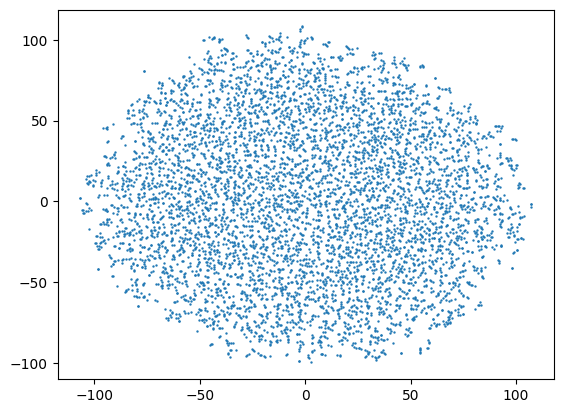

In [7]:
def make_tsne_embeddings(embeddings: np.ndarray) -> tuple[np.array, np.array]:
    """Create 2D representation of embeddings using t-SNE.

    Args:
        embeddings: an mxk array of m embeddings in k-dimensional space.

    Returns:
        A tuple of the form (x_1, x_2) where x_1 and x_2 are length m
        such that (x_1[i], x_2[i]) is the 2-dimensional point cotnaining the 2-dimensional
        repsresentation for embeddings[i, :].
    """
    tsne = sklearn.manifold.TSNE(
        n_components=2,
        perplexity=30,
        learning_rate="auto",
        # metric='cosine',
        # early_exaggeration=10.0,
        init='pca',
        verbose=True,
        n_iter=10000,
    )

    V_proj = tsne.fit_transform(embeddings)
    x = V_proj[:, 0]
    y = V_proj[:, 1]

    return x, y

U = tie.get_U()
x_1, x_2 = make_tsne_embeddings(U)

plt.scatter(x_1, x_2, s=0.5)
plt.show()